In [1]:
%pylab inline
import os
import downglacier.sandbox.tcd_utils as utils
import seaborn as sns
import pickle
import downglacier.graphics
pal = sns.color_palette('deep')
sns.set_context("talk", font_scale=1.2)
sns.set_style("ticks")

Populating the interactive namespace from numpy and matplotlib


In [2]:
wd = utils.run_standard(run=False)
odir = os.path.join(wd, 'output')

## Selected validation plots (Fig 03)

In [3]:
with open(os.path.join(odir, 'diagnostics', 'results.p'), 'rb') as f:
    vc = pickle.load(f)

In [4]:
vars = ['airtemp', 'prcpsolclip', 'swnetsum', 'mbtotfromsum']
titles = ['Temp', 'PRCP$_{Solid}$', 'SW$_{Net}$', 'MB$_{4750}$']

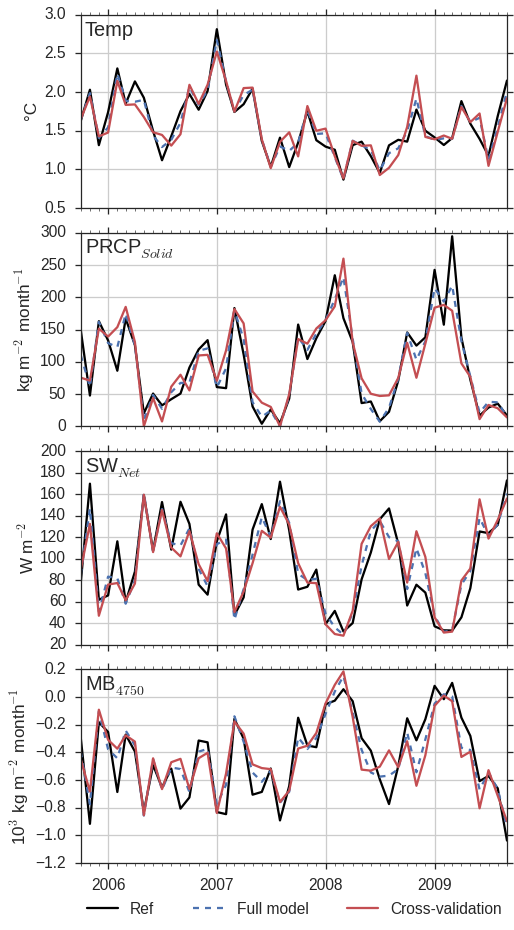

In [5]:
fig = plt.figure(figsize=(9*0.8, 16*0.8), dpi=200)
for i, vn in enumerate(vars):
    ax = fig.add_subplot(4,1,i+1)
    v = vc.getvar(vn, 4750, isdiag=i != 0)
    data = v.ref_ts.values
    fm = v.fullmodel_ts.values
    cv = v.outercv_ts.values
    unit = v.units   
    
    if i == 3:
        data = data / 1000.
        fm = fm / 1000.
        cv = cv / 1000.
    
    plt.plot(v.ref_ts.index, data, color='k', label='Ref')
    plt.plot(v.ref_ts.index, fm, color=pal[0], linestyle='--', label='Full model')
    plt.plot(v.ref_ts.index, cv, color=pal[2], label='Cross-validation')
    plt.grid()
    
    # Plot averages
#     for j in np.arange(4):
#         av = np.mean(data[j*12:(j+1)*12])
#         plt.plot(v.data.index[[j*12+0,j*12+11]], [av,av], 'k-')
#         av = np.mean(fm[j*12:(j+1)*12])
#         plt.plot(v.data.index[[j*12+0,j*12+11]], [av,av], 'k--', color=pal[0])
#         av = np.mean(cv[j*12:(j+1)*12])
#         plt.plot(v.data.index[[j*12+0,j*12+11]], [av,av], 'k-', color=pal[2])
            
    text(0.01, 0.89, titles[i], transform=ax.transAxes, fontsize=20)
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(MonthLocator())
    
    if i == 2:
        ax.set_ylim([20, 200])
    
    un = downglacier.graphics.__parseunit(unit)
    if i == 0:
        un = u'°C'
    if i == 3:
        un = '10$^{3}$ ' + un
    ax.set_ylabel(un)
    if i < 3: 
        ax.set_xticklabels('')

plt.legend(bbox_to_anchor=(0., -0.27, 1., .102),
           ncol=3, borderaxespad=0., mode="expand");
plt.tight_layout()
plt.subplots_adjust(bottom=0.06)
plt.savefig(os.path.join(utils.get_plot_dir(), 'Fig_03.pdf'))

## Physical consistency of the downscaled variables (Fig 04)

In [6]:
aobs = np.abs(vc.getvar('swout', 4750).ref_ts) / vc.getvar('swin', 4750).ref_ts
pcpobs = vc.getvar('prcpsol', 4750).ref_ts
percsolidobs = pcpobs / vc.getvar('prcptot', 4750).ref_ts
tobs = vc.getvar('airtemp', 4750).ref_ts

amod = np.abs(vc.getvar('swout', 4750).predict_ts) / vc.getvar('swin', 4750).predict_ts
pcpmod = vc.getvar('prcpsolclip', 4750, isdiag=True).predict_ts
percsolidmod = pcpmod / vc.getvar('prcptotclip', 4750, isdiag=True).predict_ts
tmod = vc.getvar('airtemp', 4750).predict_ts

mbds = vc.getvar('mbtot', 4750).predict_ts
mbmod = vc.getvar('mbtotfromsum', 4750, isdiag=True).predict_ts

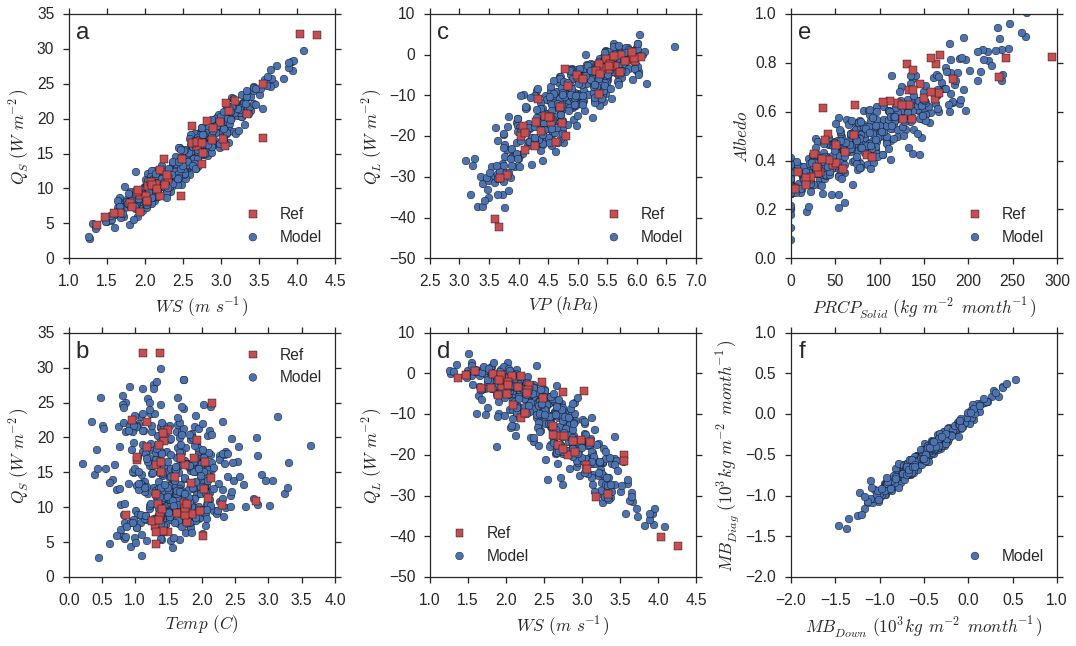

In [7]:
fig = plt.figure(figsize=(15, 9), dpi=200)

ax1 = fig.add_subplot(231)
ax1.scatter(vc.getvar('ws', 4750).ref_ts, vc.getvar('qs', 4750).ref_ts, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(vc.getvar('ws', 4750).predict_ts, vc.getvar('qs', 4750).predict_ts, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$WS\, (m\, s^{-1})$')
ax1.set_ylabel('$Q_{S}\, (W\, m^{-2})$') 
text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='lower right');

ax1 = fig.add_subplot(232)
ax1.scatter(vc.getvar('vp', 4750).ref_ts, vc.getvar('ql', 4750).ref_ts, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(vc.getvar('vp', 4750).predict_ts, vc.getvar('ql', 4750).predict_ts, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$VP\, (hPa)$')
ax1.set_ylabel('$Q_{L}\, (W\, m^{-2})$') 
text(0.03, 0.9, 'c', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='lower right');

ax1 = fig.add_subplot(233)
ax1.scatter(pcpobs, aobs, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(pcpmod, amod, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$PRCP_{Solid}\, (kg\, m^{-2}\, month^{-1})$')
ax1.set_ylabel(u'$Albedo$') 
plt.xlim([0,300])
plt.ylim([0,1])
text(0.03, 0.9, 'e', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='lower right');

ax1 = fig.add_subplot(234)
ax1.scatter(vc.getvar('airtemp', 4750).ref_ts, vc.getvar('qs', 4750).ref_ts, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(vc.getvar('airtemp', 4750).predict_ts, vc.getvar('qs', 4750).predict_ts, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$Temp\, (C)$')
ax1.set_ylabel('$Q_{S}\, (W\, m^{-2})$') 
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='upper right');

ax1 = fig.add_subplot(235)
ax1.scatter(vc.getvar('ws', 4750).ref_ts, vc.getvar('ql', 4750).ref_ts, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(vc.getvar('ws', 4750).predict_ts, vc.getvar('ql', 4750).predict_ts, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$WS\, (m\, s^{-1})$')
ax1.set_ylabel('$Q_{L}\, (W\, m^{-2})$') 
text(0.03, 0.9, 'd', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='lower left');

ax1 = fig.add_subplot(236)
ax1.scatter(mbds/1000, mbmod/1000, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$MB_{Down}\, (10^{3} kg\, m^{-2}\, month^{-1})$')
ax1.set_ylabel(u'$MB_{Diag}\, (10^{3} kg\, m^{-2}\, month^{-1})$') 
text(0.03, 0.9, 'f', transform=ax1.transAxes, fontsize=24)
legend = plt.legend(loc='lower right');

plt.tight_layout()
plt.savefig(os.path.join(utils.get_plot_dir(), 'Fig_04.pdf'))

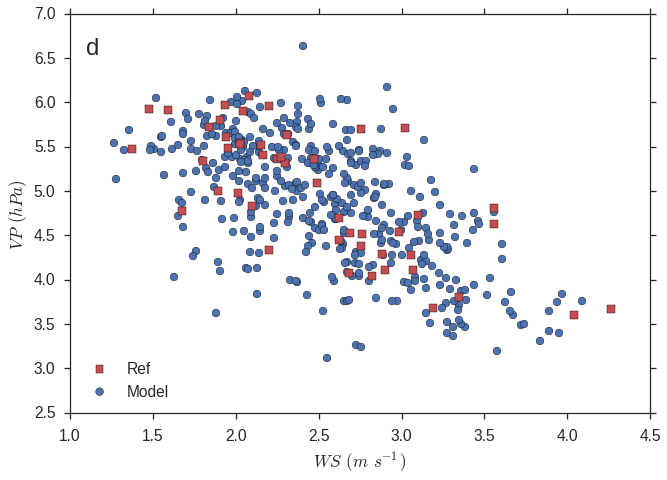

In [9]:
fig, ax1 = plt.subplots()
ax1.scatter(vc.getvar('ws', 4750).ref_ts, vc.getvar('vp', 4750).ref_ts, marker="s", label='Ref', c=pal[2], s=60, zorder=2)
ax1.scatter(vc.getvar('ws', 4750).predict_ts, vc.getvar('vp', 4750).predict_ts, marker="o", label='Model', c=pal[0], s=60)
ax1.set_xlabel(u'$WS\, (m\, s^{-1})$')
ax1.set_ylabel('$VP\, (hPa)$') 
text(0.03, 0.9, 'd', transform=ax1.transAxes, fontsize=24)
plt.legend(loc='lower left');